In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from pickle import dump

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info() #<--- We can observe that there are no null values un the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

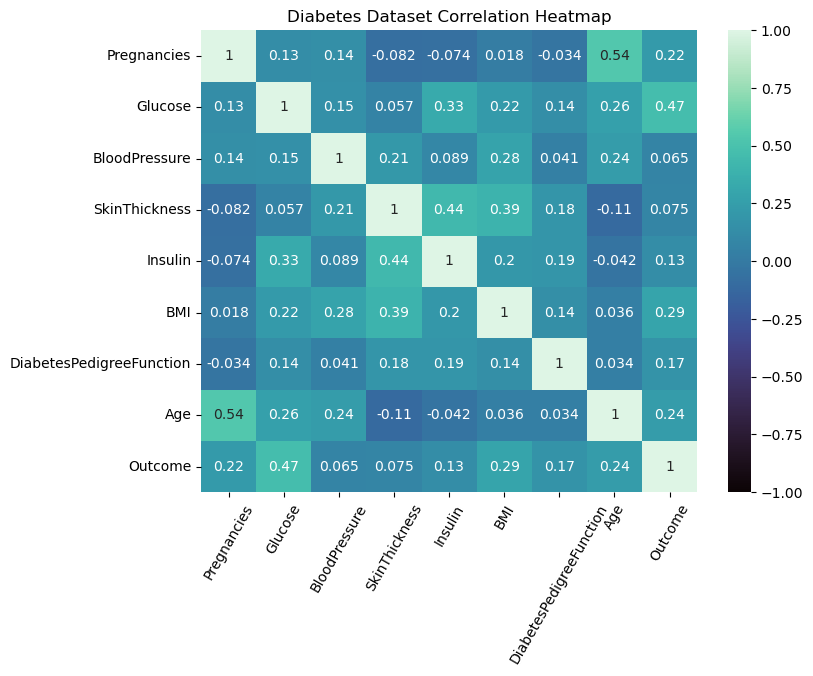

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap = "mako", annot = True, vmin= -1, vmax = 1)
plt.title("Diabetes Dataset Correlation Heatmap")
plt.xticks(rotation = 60)


In [18]:
#Splitting the data into train and test sets

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [20]:
#Fitting the model into a RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
#Predicting the model

y_pred = model.predict(X_test)

In [25]:
#Accuracy and F1 score of the model

print(f"The accuracy score for the test set is: {round(accuracy_score(y_test, y_pred),3)}%")
print(f"The F1 score for the test set is: {f1_score(y_test, y_pred):.3f}")

The accuracy score for the test set is: 0.721%
The F1 score for the test set is: 0.613


In [26]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))

In [12]:
#Grid Search
parameters = {
              'learning_rate':[0.0001, 0.001, 0.01, 0.1],
              'max_depth':[1,2,3,4,5],
              'n_estimators':[20, 50, 100, 200] ,
              'criterion' : ['gini','entropy']
             }
scorer = make_scorer(f1_score)

In [13]:
model = XGBClassifier(n_estimators = 100, subsample=0.4,gamma=20, max_depth = 5, learning_rate=0.1, random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=20, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [14]:
rndm_srch_xgboost = GridSearchCV(model, parameters, scoring=scorer)
rndm_srch_xgboost.fit(X_train,y_train)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: {

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=20,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'criterion': ['gini', 'entropy'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 50, 100, 200]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [16]:
#Best Estimator

rndm_bst = rndm_srch_xgboost.best_estimator_
rndm_bst

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=20, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred = rndm_bst.predict(X_test)

In [18]:
print(f"The accuracy score for the test set is: {round(accuracy_score(y_test, y_pred),3)}%")

The accuracy score for the test set is: 0.779%


In [19]:
print(f"The F1 score for the test set is: {f1_score(y_test, y_pred)}")

The F1 score for the test set is: 0.6530612244897959


In [20]:
model.save_model("xgb_classifier_default_42.json")

In [21]:
model = GradientBoostingClassifier(n_estimators = 100, subsample=0.4,min_samples_split=20, random_state = 42)
model.fit(X_train, y_train)



GradientBoostingClassifier(min_samples_split=20, random_state=42, subsample=0.4)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print(f"The accuracy score for the test set is: {round(accuracy_score(y_test, y_pred),3)}%")

The accuracy score for the test set is: 0.753%


In [24]:
print(f"The F1 score for the test set is: {f1_score(y_test, y_pred)}")

The F1 score for the test set is: 0.6724137931034483


In [25]:
#Grid Search

parameters = {
              'C':[0.01, 0.1, 0.5, 1.0],
              'kernel':["linear","poly","rbf"]
              
             }
scorer = make_scorer(f1_score)

In [26]:
model = SVC()
model_SVC = GridSearchCV(model, parameters, scoring=scorer)
model_SVC.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1.0],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [27]:
#Best estimator

model_best= model_SVC.best_estimator_
model_best

SVC(C=0.01, kernel='linear')

In [28]:
y_pred = model_best.predict(X_test)

In [29]:
print(f"The accuracy score for the test set is: {round(accuracy_score(y_test, y_pred),3)}%")

The accuracy score for the test set is: 0.734%


In [30]:
print(f"The F1 score for the test set is: {f1_score(y_test, y_pred)}")

The F1 score for the test set is: 0.6306306306306306
